In [16]:
import numpy as np
import cv2

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
## plot for(a)
def subplot(points , result1 , result2 , img):


    plt.imshow(img)
    plt.scatter(points[:, 0], points[:, 1],  s=0.5)
    plt.plot(result1[:, 0], result1[:, 1], 'b-' ,linewidth=0.5)

    plt.plot(result2[:, 0], result2[:, 1], 'r-' ,linewidth=0.5)
    plt.savefig('1a.png')
    plt.imshow(img)
    plt.show()
    plt.close()

## plot for(b)
def plot(points , result , img):
    plt.imshow(img)
    plt.scatter(points[:, 0], points[:, 1],  s=5)
    plt.plot(result[:, 0], result[:, 1], 'r-' ,linewidth=0.5)
    plt.savefig('1b.png')
    plt.imshow(img)
    plt.show()
    plt.close()


In [ ]:
## TODO calculate bezier curve
def bezier_curve(points , t , scale_up_ratio = 1):

    pass

    return results

In [ ]:
## TODO Scale up image
def nearest_inter(img):        
    pass
    return scale_up_img

## 1.a

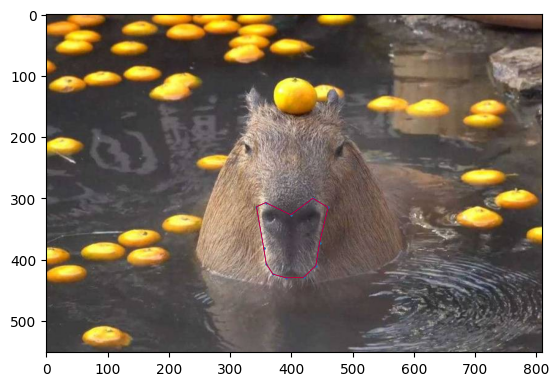

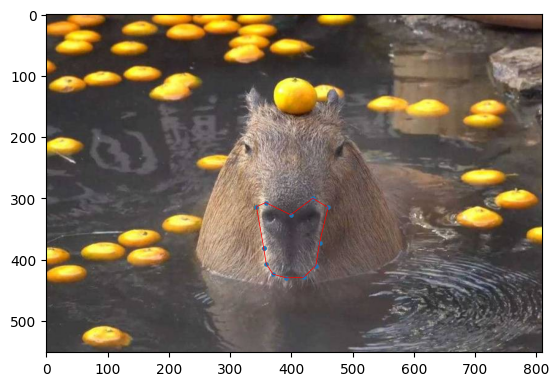

In [17]:
  # Load the image and points
img = cv2.imread("bg.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
points = np.loadtxt("points.txt")


## 1.a
## TODO: You shold replace result1 , result2 with low-detail and high-detail curve results return by function bezier_curve()
result1 = points
result2 = points
subplot(points  , result1 , result2 , img)


## 1.b

In [ ]:
## TODO: You shold replace img with scale up img return by function nearest_inter() and result with scale up curve
img  = img
result = points
plot(points  , result , img)